# 速度構造推定

# データ読み込み

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import csv
import pandas as pd
from matplotlib.dates import DateFormatter

R_sun = 6.96e5 # km

In [11]:
# 読み込んだデータを準備
df_converted = pd.read_csv('20220613_CMEheight_LASCO.csv')

# TIMEデータを指定された形式に変換
Time_data = pd.to_datetime(df_converted['TIME'], format='%H:%M:%S').to_numpy()

# 閾値時刻を設定してフィルタリング
threshold_time = np.datetime64('1900-01-01T03:50:10')
Time_data_sliced = Time_data[Time_data < threshold_time]

# 高さデータをフィルタリング
Height_data = df_converted['HEIGHT'].to_numpy()
Height_data_sliced = Height_data[:len(Time_data_sliced)]

# 太陽半径 (R_sun) を設定（単位に応じて調整）
R_sun = 695700  # km

# 時間差と高さ差を計算
time_diff = np.diff(Time_data_sliced).astype('timedelta64[s]').astype(int)
height_diff = np.diff(Height_data_sliced)

# 速度を計算（km/s 単位で計算）
velocity = height_diff * R_sun / time_diff

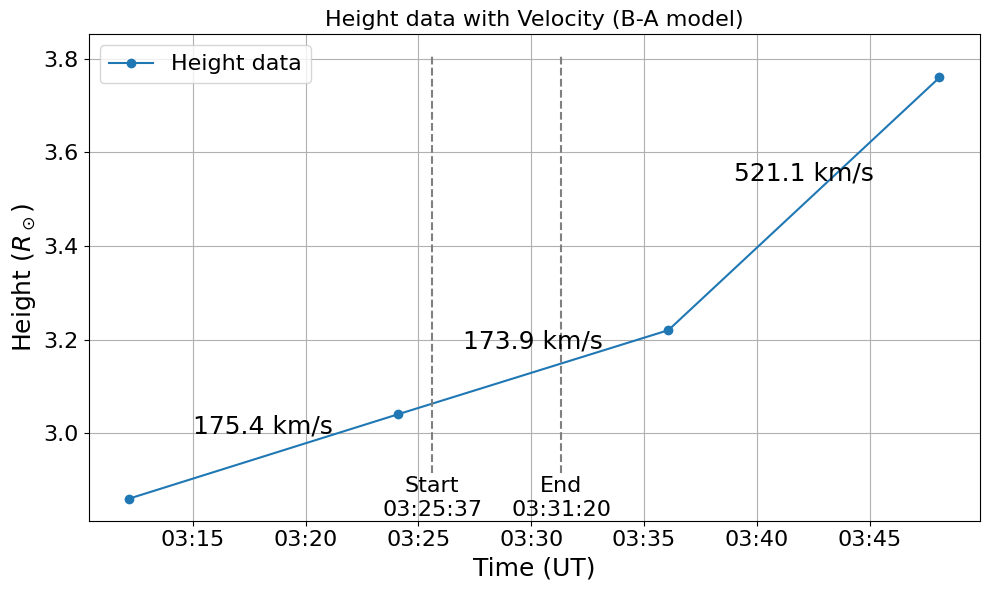

In [23]:
# グラフの作成
fig, ax = plt.subplots(tight_layout=True, figsize=(10, 6))
ax.plot(Time_data_sliced, Height_data_sliced, label='Height data', marker='o')

# 各区間の速度を注釈として表示
for i in range(len(velocity)):
    midpoint_time = Time_data_sliced[i] + (Time_data_sliced[i + 1] - Time_data_sliced[i]) / 2  # 中間時刻を計算
    ax.text(midpoint_time, Height_data_sliced[i] + (Height_data_sliced[i + 1] - Height_data_sliced[i]) / 2 + 0.05, 
            f'{velocity[i]:.1f} km/s', fontsize=18, ha='center')

# 特定の時刻を赤い垂直線で表示
event_start_time = np.datetime64('1900-01-01T03:25:37')
event_end_time = np.datetime64('1900-01-01T03:31:20')
ymin, ymax = ax.get_ylim()
ax.vlines(event_start_time, ymin+0.1, ymax, color='gray', linestyle='--')
ax.text(event_start_time, ymin, f'Start\n{str(event_start_time)[11:]}', fontsize=16, ha='center', va='bottom' ,color='black')
ax.vlines(event_end_time, ymin+0.1, ymax, color='gray', linestyle='--')
ax.text(event_end_time, ymin, f'End\n{str(event_end_time)[11:]}', fontsize=16, ha='center', va='bottom', color='black')


# 軸ラベルやタイトルの設定
ax.set_xlabel('Time (UT)', fontsize=18)
ax.set_ylabel(r'Height ($R_\odot$)', fontsize=18)
ax.grid()
ax.legend(loc='best', fontsize=16)
ax.tick_params(axis='both', labelsize=16)

# x軸のフォーマットを時刻形式に設定
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.title.set_text('Height data with Velocity (B-A model)')
ax.title.set_fontsize(16)

# グラフの表示
plt.show()

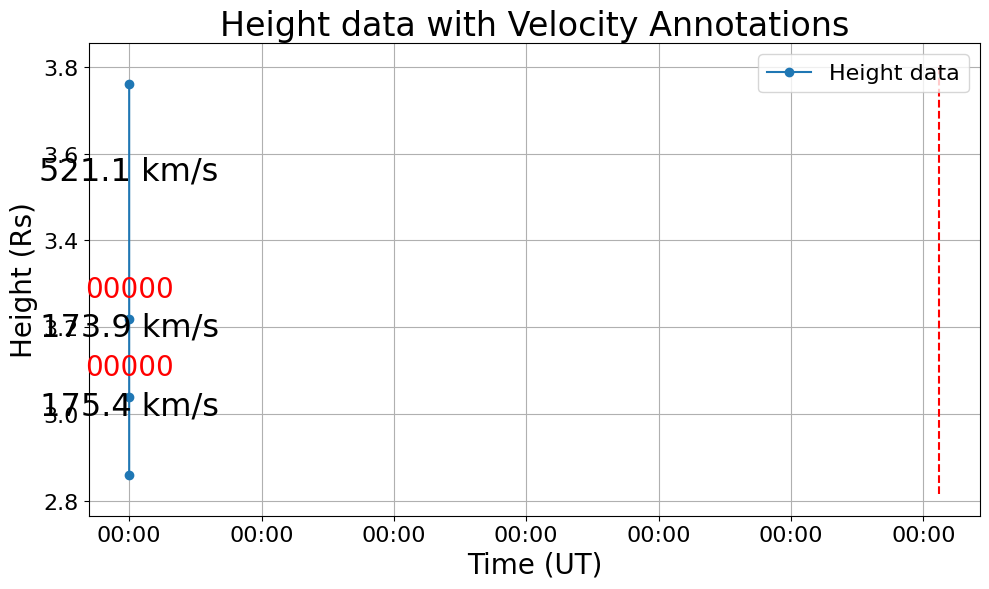

In [22]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(tight_layout=True, figsize=(10, 6))
ax.plot(Time_data_sliced, Height_data_sliced, label='Height data', marker='o')

# テキストとして速度を表示するために各区間の中間位置を計算
for i in range(len(velocity)):
    midpoint_time = Time_data_sliced[i] + (Time_data_sliced[i + 1] - Time_data_sliced[i]) / 2  # 中間時刻を計算
    ax.text(midpoint_time, Height_data_sliced[i] + (Height_data_sliced[i + 1] - Height_data_sliced[i]) / 2 + 0.05, 
            f'{velocity[i]:.1f} km/s', fontsize=23, ha='center')

Time_1 = str(Time_data_sliced[1])[-5:]
Time_2 = str(Time_data_sliced[2])[-5:]

# y軸の範囲を取得
ymin, ymax = ax.get_ylim()

ax.text(Time_data_sliced[1], Height_data_sliced[1] + 0.05, f'{Time_1}', fontsize=20, ha='center', color='red')
ax.text(Time_data_sliced[2], Height_data_sliced[2] + 0.05, f'{Time_2}', fontsize=20, ha='center', color='red')

# 修正箇所: np.datetime を np.datetime64 に変更
ax.vlines(np.datetime64('2022-06-13T03:25:37'), ymin, ymax, color='red', linestyle='--')

# 軸ラベルやフォーマット設定
ax.set_xlabel('Time (UT)', fontsize=20)
ax.set_ylabel('Height (Rs)', fontsize=20)
ax.grid()
ax.legend(loc='best', fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
ax.title.set_text('Height data with Velocity Annotations')
ax.title.set_fontsize(24)
plt.show()


In [7]:
formatted_time = Time_data_sliced[3].astype('datetime64[m]').astype(str)[11:16]  # '1900-01-01T03:24'形式の時間部分を抽出
formatted_time

IndexError: index 3 is out of bounds for axis 0 with size 3

array([175.46218487, 174.        , 521.27600555])

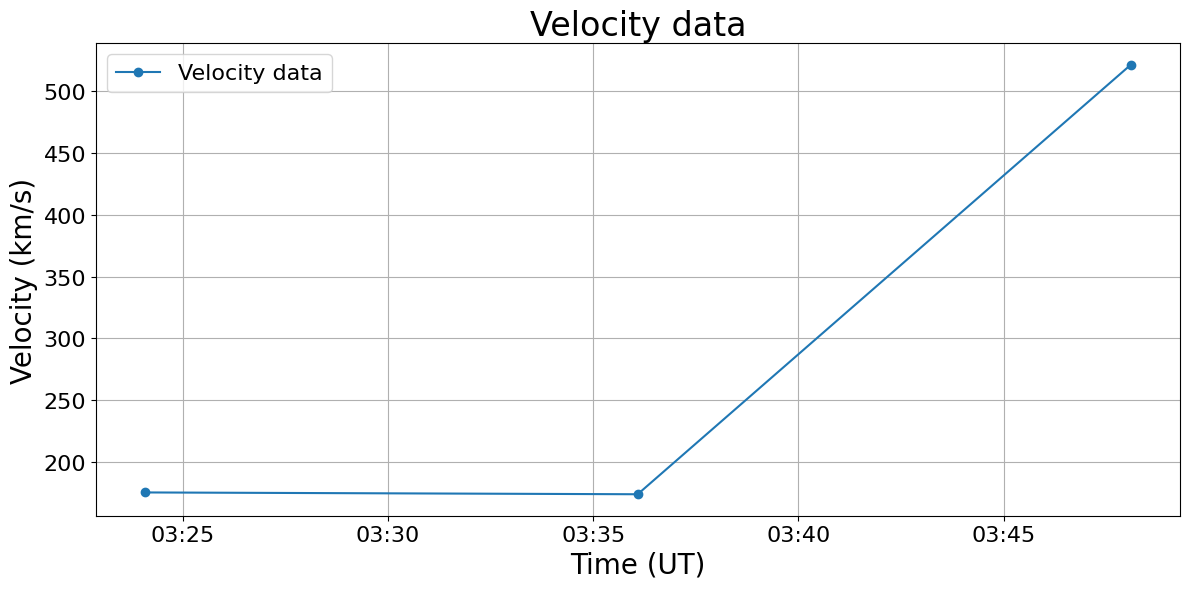

In [33]:
fig, ax = plt.subplots(tight_layout=True, figsize=(12, 6))
ax.plot(Time_data_sliced[1:], velocity, label='Velocity data', marker='o')
ax.set_xlabel('Time (UT)', fontsize=20)
ax.set_ylabel('Velocity (km/s)', fontsize=20)
ax.grid()
ax.legend(loc='best', fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
ax.title.set_text('Velocity data')
ax.title.set_fontsize(24)
plt.show()


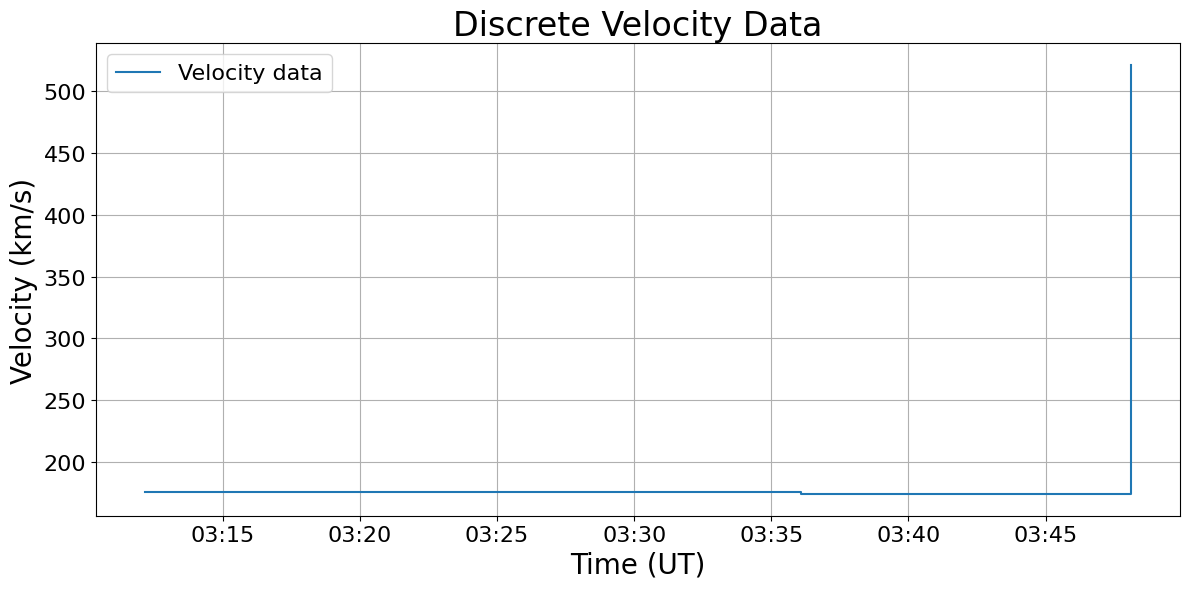

In [49]:
# グラフに時間ごとの離散的な速度をプロットするために準備
# この場合、各時間区間で定数の値を維持するプロット方法を使用

# グラフにプロットするためにx軸とy軸のデータを拡張
Time_plot = np.repeat(Time_data_sliced[1:], 2)
Velocity_plot = np.repeat(velocity, 2)

# 最初と最後にそれぞれの始点と終点を追加
Time_plot = np.insert(Time_plot, 0, Time_data_sliced[0])  # 開始点
Time_plot = np.append(Time_plot, Time_data_sliced[-1])    # 終了点

Velocity_plot = np.insert(Velocity_plot, 0, velocity[0])  # 開始点
Velocity_plot = np.append(Velocity_plot, velocity[-1])    # 終了点

# グラフを作成
fig, ax = plt.subplots(tight_layout=True, figsize=(12, 6))
ax.plot(Time_plot, Velocity_plot, label='Velocity data', drawstyle='steps-post')
ax.set_xlabel('Time (UT)', fontsize=20)
ax.set_ylabel('Velocity (km/s)', fontsize=20)
ax.grid()
ax.legend(loc='best', fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
ax.title.set_text('Discrete Velocity Data')
ax.title.set_fontsize(24)
plt.show()



In [50]:
Velocity_plot


array([175.46218487, 175.46218487, 175.46218487, 174.        ,
       174.        , 521.27600555, 521.27600555, 521.27600555])

In [2]:
# h_nose = [3.22, np.nan, 3.388, np.nan, 3.59, np.nan, 4.096, 4.568, 5.034, 5.634, 6.184, 6.854, np.nan, 
#           8.134, np.nan,9.612, np.nan,11.022, np.nan,12.314, np.nan,13.728, np.nan,15.254, np.nan,16.55, np.nan,18.11, np.nan,19.456]
# v_nose = []

# # h_noseの値がnp.nanのときは、その値を前後の値の平均に変更する
# for i in range(len(h_nose)):
#         if np.isnan(h_nose[i]):
#                 h_nose[i] = (h_nose[i-1] + h_nose[i+1]) / 2
                



# for i in range(len(h_nose)-1):
#         v_nose_value = (h_nose[i+1]-h_nose[i])*696000/360
#         v_nose.append(v_nose_value)
                

              



                
# # 24時間表示でリストに入れる
# time = [datetime.strptime('03:12', '%H:%M'), datetime.strptime('03:18', '%H:%M'),datetime.strptime('03:24', '%H:%M'),datetime.strptime('03:30', '%H:%M'),datetime.strptime('03:36', '%H:%M'),datetime.strptime('03:42', '%H:%M'),
#         datetime.strptime('03:48', '%H:%M'),datetime.strptime('03:54', '%H:%M'),datetime.strptime('04:00', '%H:%M'),datetime.strptime('04:06', '%H:%M'),datetime.strptime('04:12', '%H:%M'),
#         datetime.strptime('04:18', '%H:%M'),datetime.strptime('04:24', '%H:%M'),datetime.strptime('04:30', '%H:%M'),datetime.strptime('04:36', '%H:%M'),datetime.strptime('04:42', '%H:%M'),
#         datetime.strptime('04:48', '%H:%M'),datetime.strptime('04:54', '%H:%M'),datetime.strptime('05:00', '%H:%M'),datetime.strptime('05:06', '%H:%M'),datetime.strptime('05:12', '%H:%M'),
#         datetime.strptime('05:18', '%H:%M'),datetime.strptime('05:24', '%H:%M'),datetime.strptime('05:30', '%H:%M'),datetime.strptime('05:36', '%H:%M'),datetime.strptime('05:42', '%H:%M'),
#         datetime.strptime('05:48', '%H:%M'),datetime.strptime('05:54', '%H:%M'),datetime.strptime('06:00', '%H:%M'),datetime.strptime('06:06', '%H:%M')]

# time_2 = [datetime.strptime('03:15', '%H:%M'),datetime.strptime('03:21', '%H:%M'),datetime.strptime('03:27', '%H:%M'),datetime.strptime('03:33', '%H:%M'),datetime.strptime('03:39', '%H:%M'),datetime.strptime('03:45', '%H:%M'),
#           datetime.strptime('03:51', '%H:%M'),datetime.strptime('03:57', '%H:%M'),datetime.strptime('04:03', '%H:%M'),datetime.strptime('04:09', '%H:%M'),datetime.strptime('04:15', '%H:%M'),
#           datetime.strptime('04:21', '%H:%M'),datetime.strptime('04:27', '%H:%M'),datetime.strptime('04:33', '%H:%M'),datetime.strptime('04:39', '%H:%M'),datetime.strptime('04:45', '%H:%M'),
#           datetime.strptime('04:51', '%H:%M'),datetime.strptime('04:57', '%H:%M'),datetime.strptime('05:03', '%H:%M'),datetime.strptime('05:09', '%H:%M'),datetime.strptime('05:15', '%H:%M'),
#           datetime.strptime('05:21', '%H:%M'),datetime.strptime('05:27', '%H:%M'),datetime.strptime('05:33', '%H:%M'),datetime.strptime('05:39', '%H:%M'),datetime.strptime('05:45', '%H:%M'),
#           datetime.strptime('05:51', '%H:%M'),datetime.strptime('05:57', '%H:%M'),datetime.strptime('06:03', '%H:%M'),datetime.strptime('06:09', '%H:%M')]

# # # dictに変換 key:time, value:v_nose
# # v_nose_dict = {}
# # for i in range(len(time)-1):
# #         v_nose_dict[time[i]] = v_nose[i]

[162.40000000000015,
 162.3999999999993,
 195.26666666666662,
 195.26666666666662,
 489.13333333333355,
 489.13333333333355,
 912.5333333333324,
 900.9333333333336,
 1160.000000000001,
 1063.333333333333,
 1295.3333333333333,
 1237.3333333333326,
 1237.3333333333344,
 1428.7333333333347,
 1428.7333333333313,
 1363.0000000000002,
 1363.0000000000002,
 1248.9333333333313,
 1248.933333333335,
 1366.8666666666682,
 1366.8666666666647,
 1475.133333333333,
 1475.133333333333,
 1252.800000000003,
 1252.7999999999993,
 1507.9999999999955,
 1508.0000000000023,
 1107.8000000000009,
 1107.8000000000009

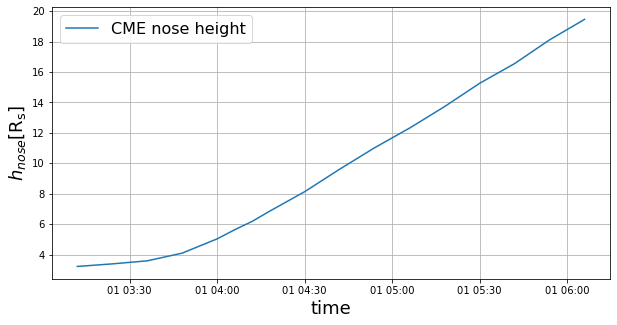

In [13]:
# x:time, y:h_noseででプロット
# x:timeは%H:%Mで表示
# 軸のメモリを増やす
plt.figure(figsize=(10, 5))
plt.plot(time, h_nose, label="CME nose height")
# plt.xticks(rotation=90)
plt.xlabel('time', fontsize=18)
plt.ylabel(r'$h_{nose} [\rm{R_s}]$', fontsize=18)

plt.legend(loc="best", fontsize=16)
plt.grid()
plt.show()

In [6]:
v_nose

[162.40000000000015,
 162.3999999999993,
 195.26666666666662,
 195.26666666666662,
 489.13333333333355,
 489.13333333333355,
 912.5333333333324,
 900.9333333333336,
 1160.000000000001,
 1063.333333333333,
 1295.3333333333333,
 1237.3333333333326,
 1237.3333333333344,
 1428.7333333333347,
 1428.7333333333313,
 1363.0000000000002,
 1363.0000000000002,
 1248.9333333333313,
 1248.933333333335,
 1366.8666666666682,
 1366.8666666666647,
 1475.133333333333,
 1475.133333333333,
 1252.800000000003,
 1252.7999999999993,
 1507.9999999999955,
 1508.0000000000023,
 1301.1333333333369,
 1301.13333333333]

std= 7.349210086049555
std= 102.38360758369402
std= 90.57948692573096
std= 7.349210086049555
y = 13.15x + 159.11 ($\sigma=$7.35)
std= 102.38360758369402
y = 149.67x + 289.36 ($\sigma=$102.38)
std= 90.57948692573096
y = 4.42x + 1310.71 ($\sigma=$90.58)


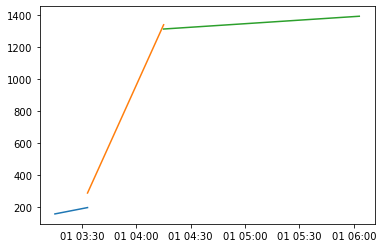

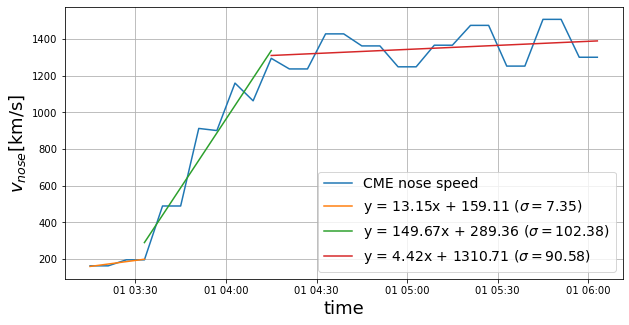

In [7]:
def regression_line(start_time, end_time, label):
    # Find the indices of the time range
    start_index = time_2.index(start_time)
    end_index = time_2.index(end_time)

    # Select the v_nose values within the time range
    v_nose_range = v_nose[start_index:end_index]

    # Fit regression lines to the v_nose range
    x_range = np.arange(0, len(v_nose_range))
    p = np.polyfit(x_range, v_nose_range, 1)

    # Plot the regression line
    plt.plot(time_2[start_index:end_index], np.poly1d(p)(x_range), label=label)
    
    # 回帰直線からの広がり具合を求める
    std = np.std(np.poly1d(p)(x_range) - v_nose_range)
    print('std=', std)

    


    # Return the equation of the regression line
    return f"y = {p[0]:.2f}x + {p[1]:.2f} ($\sigma=${std:.2f})"




start_time_1 = datetime.strptime('03:15', '%H:%M')
end_time_1 = datetime.strptime('03:39', '%H:%M')

start_time_2 = datetime.strptime('03:33', '%H:%M')
end_time_2 = datetime.strptime('04:21', '%H:%M')

start_time_3 = datetime.strptime('04:15', '%H:%M')
end_time_3 = datetime.strptime('06:09', '%H:%M')



# Specify the time ranges and labels for the regression lines
regression_ranges = [
    (start_time_1, end_time_1, 
     f'{regression_line(start_time_1, end_time_1, "Regression Line 1")}'),
    (start_time_2, end_time_2,
     f'{regression_line(start_time_2, end_time_2, "Regression Line 2")}'),
    (start_time_3, end_time_3, 
     f'{regression_line(start_time_3, end_time_3, "Regression Line 3")}')
]

# Plot the v_nose values and the regression lines
plt.figure(figsize=(10, 5))
plt.plot(time_2[:-1], v_nose, label='CME nose speed')

for start_time, end_time, label in regression_ranges:
    regression_equation = regression_line(start_time, end_time, label)
    print(regression_equation)

# plt.xticks(rotation=90)
plt.xlabel('time', fontsize=18)
plt.ylabel(r'$v_{nose} [\rm{km/s}]$', fontsize=18)
plt.grid()
plt.legend(loc="best", fontsize=14)
plt.show()


In [8]:

    # v_nose_range_1 = v_nose[time.index(start_time):time.index(end_time)]
    # # Calculate the standard deviation of speeds from the regression lines
    # std_dev_1 = np.std(np.poly1d(p)(np.arange(0, len(v_nose_range_1))))
    #    # Print the standard deviations
    # print(f"Standard Deviation: {std_dev_1:.2f}")

In [9]:
def v_nose_discrete(start_time, end_time):
    # Find the indices of the time range

    start_index = time.index(start_time)
    end_index = time.index(end_time)

    # Select the v_nose values within the time range
    v_nose_time = time[start_index:end_index+1]
    v_nose_range = v_nose[start_index:end_index+1]
    
    return v_nose_time, v_nose_range

In [10]:
v_nose_time_dict = {datetime.strptime('03:18', '%H:%M'):162.4, datetime.strptime('03:30', '%H:%M'):195.27, datetime.strptime('03:42', '%H:%M'):489.13, datetime.strptime('03:51', '%H:%M'):912.53,
                    datetime.strptime('03:57', '%H:%M'):900.93, datetime.strptime('04:03', '%H:%M'):1160, datetime.strptime('04:03', '%H:%M'):1160, datetime.strptime('04:09', '%H:%M'):1063.33,
                    datetime.strptime('04:15', '%H:%M'):1295.33, datetime.strptime('04:24', '%H:%M'):1237.33, datetime.strptime('04:36', '%H:%M'):1428.73, datetime.strptime('04:48', '%H:%M'):1363,
                    datetime.strptime('05:00', '%H:%M'):1248.93, datetime.strptime('05:12', '%H:%M'):1366.87, datetime.strptime('05:24', '%H:%M'):1475.13, datetime.strptime('05:36', '%H:%M'):1252.8,
                    datetime.strptime('05:48', '%H:%M'):1508, datetime.strptime('06:00', '%H:%M'):1301.13}

std= 7.349210086049555
std= 102.38360758369402
std= 90.57948692573096
std= 7.349210086049555
y = 13.15x + 159.11 ($\sigma=$7.35)
std= 102.38360758369402
y = 149.67x + 289.36 ($\sigma=$102.38)
std= 90.57948692573096
y = 4.42x + 1310.71 ($\sigma=$90.58)


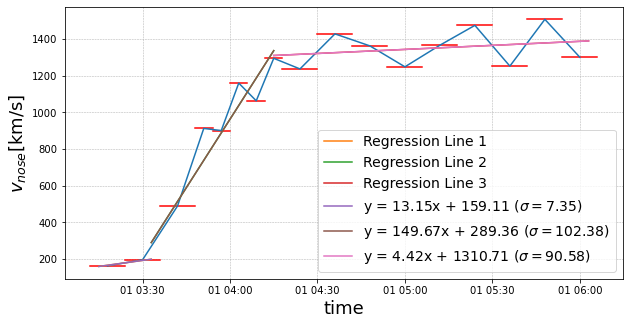

In [11]:
def regression_line(start_time, end_time, label):
    # Find the indices of the time range
    start_index = time_2.index(start_time)
    end_index = time_2.index(end_time)

    # Select the v_nose values within the time range
    v_nose_range = v_nose[start_index:end_index]

    # Fit regression lines to the v_nose range
    x_range = np.arange(0, len(v_nose_range))
    p = np.polyfit(x_range, v_nose_range, 1)

    # Plot the regression line
    plt.plot(time_2[start_index:end_index], np.poly1d(p)(x_range), label=label)
    
    # 回帰直線からの広がり具合を求める
    std = np.std(np.poly1d(p)(x_range) - v_nose_range)
    print('std=', std)

    


    # Return the equation of the regression line
    return f"y = {p[0]:.2f}x + {p[1]:.2f} ($\sigma=${std:.2f})"




# Plot the v_nose values and the regression lines
plt.figure(figsize=(10, 5))
# plt.plot(time_2[:-1], v_nose, label='CME nose speed')






# Define a function to parse time for better readability and reusability
def parse_time(t):
    return datetime.strptime(t, '%H:%M')

# Consolidate time intervals and values in a list of tuples
time_intervals = [
    (('03:12', '03:24'), [162.4] * 3),
    (('03:24', '03:36'), [195.27] * 3),
    (('03:36', '03:48'), [489.13] * 3),
    (('03:48', '03:54'), [912.53] * 2),
    (('03:54', '04:00'), [900.93] * 2),
    (('04:00', '04:06'), [1160] * 2),
    (('04:06', '04:12'), [1063.33] * 2),
    (('04:12', '04:18'), [1295.33] * 2),
    (('04:18', '04:30'), [1237.33] * 3),
    (('04:30', '04:42'), [1428.73] * 3),
    (('04:42', '04:54'), [1363] * 3),
    (('04:54', '05:06'), [1248.93] * 3),
    (('05:06', '05:18'), [1366.87] * 3),
    (('05:18', '05:30'), [1475.13] * 3),
    (('05:30', '05:42'), [1252.8] * 3),
    (('05:42', '05:54'), [1508] * 3),
    (('05:54', '06:06'), [1301.13] * 3),
]
# Iterate over the time intervals and plot each
for (start, end), values in time_intervals:
    # Here assuming v_nose_discrete returns the discrete time values for plotting
    # Replaced with a mock function to illustrate the improvement
    plt.plot(v_nose_discrete(parse_time(start), parse_time(end))[0], values, color='red')


plt.plot(v_nose_time_dict.keys(), v_nose_time_dict.values())


start_time_1 = datetime.strptime('03:15', '%H:%M')
end_time_1 = datetime.strptime('03:39', '%H:%M')

start_time_2 = datetime.strptime('03:33', '%H:%M')
end_time_2 = datetime.strptime('04:21', '%H:%M')

start_time_3 = datetime.strptime('04:15', '%H:%M')
end_time_3 = datetime.strptime('06:09', '%H:%M')



# Specify the time ranges and labels for the regression lines
regression_ranges = [
    (start_time_1, end_time_1, 
     f'{regression_line(start_time_1, end_time_1, "Regression Line 1")}'),
    (start_time_2, end_time_2,
     f'{regression_line(start_time_2, end_time_2, "Regression Line 2")}'),
    (start_time_3, end_time_3, 
     f'{regression_line(start_time_3, end_time_3, "Regression Line 3")}')
]

# Plot the v_nose values and the regression lines

# plt.plot(time_2[:-1], v_nose, label='CME nose speed')

for start_time, end_time, label in regression_ranges:
    regression_equation = regression_line(start_time, end_time, label)
    print(regression_equation)


plt.xlabel('time', fontsize=18)
plt.ylabel(r'$v_{nose} [\rm{km/s}]$', fontsize=18)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.legend(loc="best", fontsize=14)


plt.show()

162.40000000000015,
 162.3999999999993,
 195.26666666666662,
 195.26666666666662,
 489.13333333333355,
 489.13333333333355,
 912.5333333333324,
 900.9333333333336,
 1160.000000000001,
 1063.333333333333,
 1295.3333333333333,
 1237.3333333333326,
 1237.3333333333344,
 1428.7333333333347,
 1428.7333333333313,
 1363.0000000000002,
 1363.0000000000002,
 1248.9333333333313,
 1248.933333333335,
 1366.8666666666682,
 1366.8666666666647,
 1475.133333333333,
 1475.133333333333,
 1252.800000000003,
 1252.7999999999993,
 1507.9999999999955,
 1508.0000000000023,
 1301.1333333333369,
 1301.13333333333

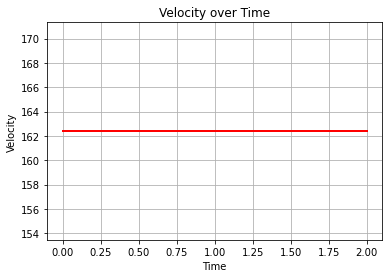

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime

def v_nose_discrete(start_time, end_time):
    # 仮の速度データを返す（ここでは一定の値を返す）
    v = [162.4] * 3
    return v

plt.plot(v_nose_discrete(datetime.strptime('03:12', '%H:%M'), datetime.strptime('03:24', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('03:24', '%H:%M'), datetime.strptime('03:36', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('03:36', '%H:%M'), datetime.strptime('03:48', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('03:48', '%H:%M'), datetime.strptime('03:54', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('03:54', '%H:%M'), datetime.strptime('04:00', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('04:00', '%H:%M'), datetime.strptime('04:06', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('04:06', '%H:%M'), datetime.strptime('04:12', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('04:12', '%H:%M'), datetime.strptime('04:18', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('04:18', '%H:%M'), datetime.strptime('04:30', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('04:30', '%H:%M'), datetime.strptime('04:42', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('04:42', '%H:%M'), datetime.strptime('04:54', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('04:54', '%H:%M'), datetime.strptime('05:06', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('05:06', '%H:%M'), datetime.strptime('05:18', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('05:18', '%H:%M'), datetime.strptime('05:30', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('05:30', '%H:%M'), datetime.strptime('05:42', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('05:42', '%H:%M'), datetime.strptime('05:54', '%H:%M')), color='red')
plt.plot(v_nose_discrete(datetime.strptime('05:54', '%H:%M'), datetime.strptime('06:06', '%H:%M')), color='red')

plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity over Time')
plt.grid(True)
plt.show()
